<a href="https://colab.research.google.com/github/dorra28/Metatranscriptomics-analysis/blob/main/mutation_rate_Sars_cov2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the first TSV file to examine its structure
file_path = '/content/output_mutations.tsv'
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the dataframe
df.head()

,CHROM,POS,ID,REF,ALT,Gene,VariantType,AminoAcidChange,NucleotideChange
0,##fileformat=VCFv4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,##fileDate=20230728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,##source=lofreq call -f /home2/espace-etudiant...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,##reference=/home2/espace-etudiant/dorra/GATK/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"##INFO=<ID=DP,Number=1,Type=Integer,Descriptio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Re-load the file, skipping the metadata lines
df = pd.read_csv(file_path, sep='\t', comment='#')

# Display the first few rows of the cleaned dataframe
df.head()

,CHROM,POS,ID,REF,ALT,Gene,VariantType,AminoAcidChange,NucleotideChange
0,NC_045512.2,161,.,A,G,GU280_gp01,upstream_gene_variant,105.0,upstream_gene_variant
1,NC_045512.2,210,.,G,T,GU280_gp01,upstream_gene_variant,56.0,upstream_gene_variant
2,NC_045512.2,241,.,C,T,GU280_gp01,upstream_gene_variant,25.0,upstream_gene_variant
3,NC_045512.2,249,.,T,A,GU280_gp01,upstream_gene_variant,17.0,upstream_gene_variant
4,NC_045512.2,311,.,C,G,GU280_gp01,missense_variant,NaN,missense_variant


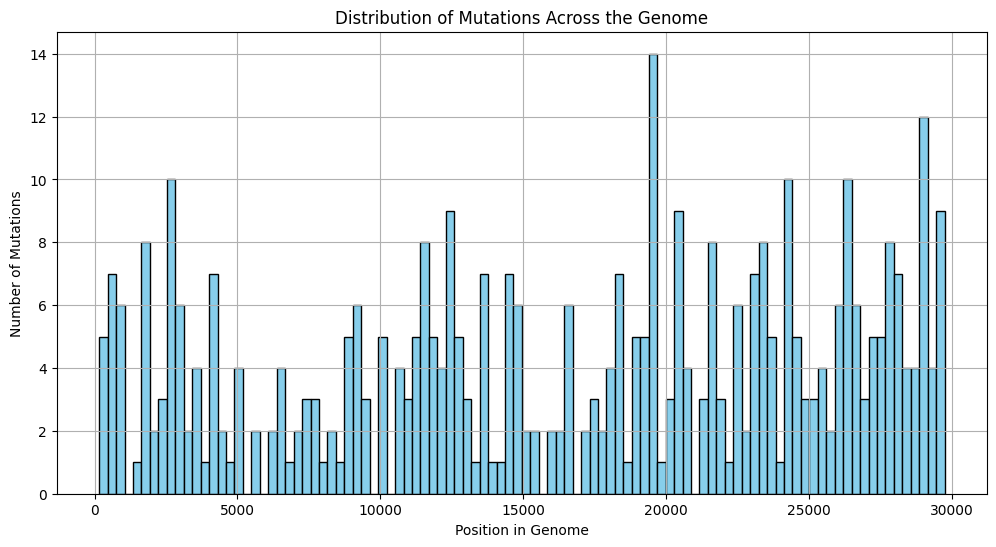

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of mutations across the genome
plt.figure(figsize=(12, 6))
plt.hist(df['POS'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Mutations Across the Genome')
plt.xlabel('Position in Genome')
plt.ylabel('Number of Mutations')
plt.grid(True)
plt.show()

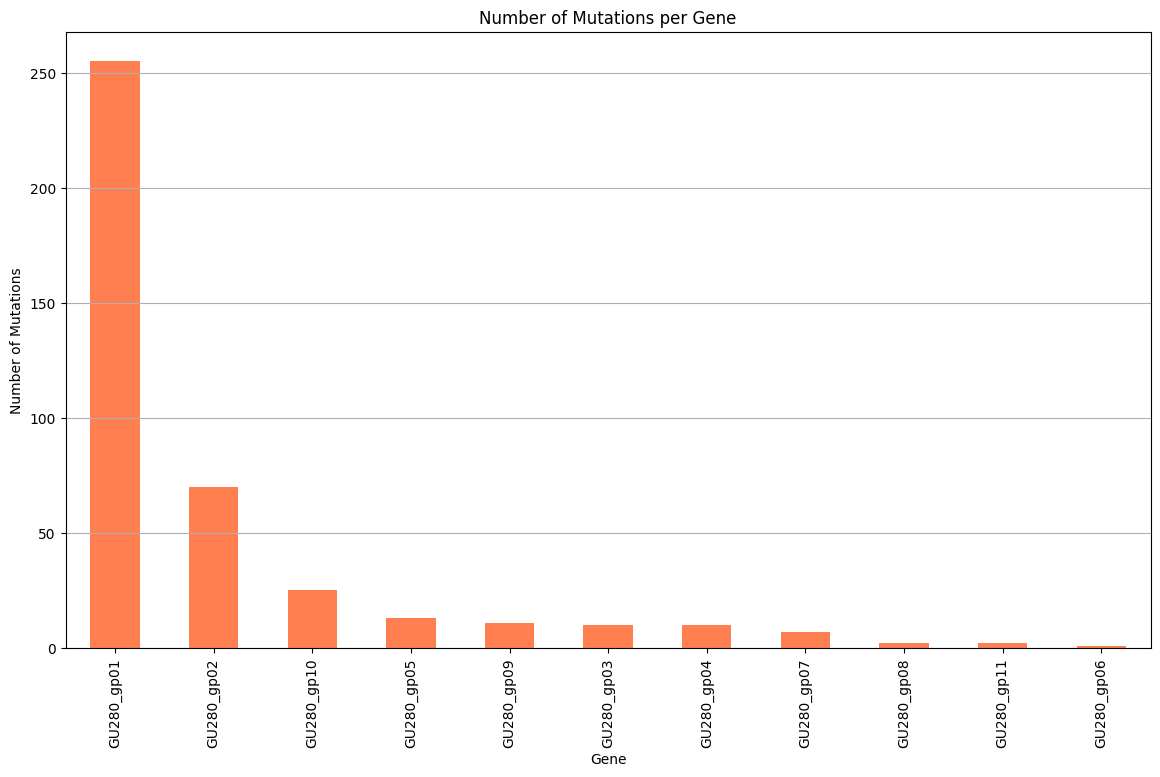

In [ ]:
# Grouping the data by gene and counting the number of mutations for each gene
gene_mutation_counts = df['Gene'].value_counts()

# Plotting the number of mutations per gene
plt.figure(figsize=(14, 8))
gene_mutation_counts.plot(kind='bar', color='coral')
plt.title('Number of Mutations per Gene')
plt.xlabel('Gene')
plt.ylabel('Number of Mutations')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

<ipython-input-6-ebe29f0ff257>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs, ignore_index=True)


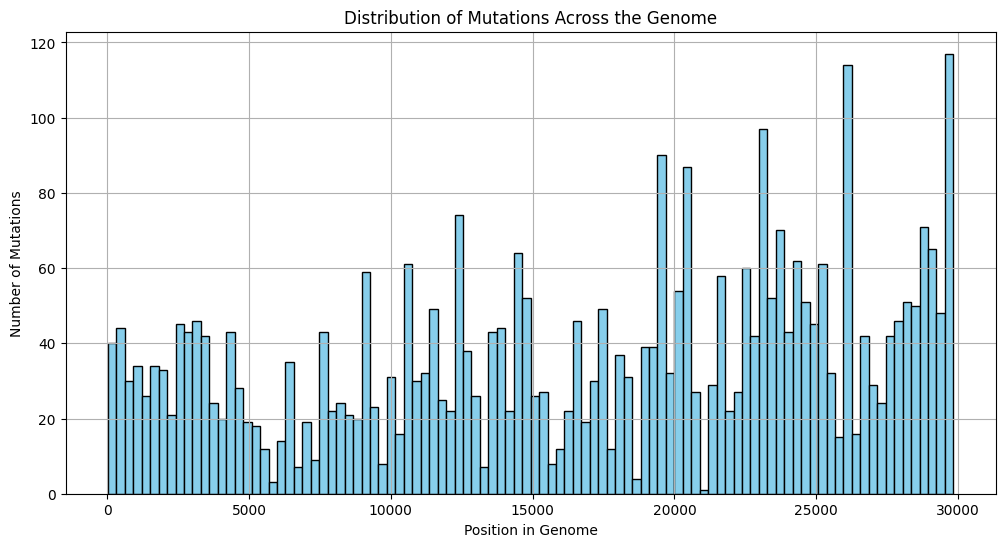

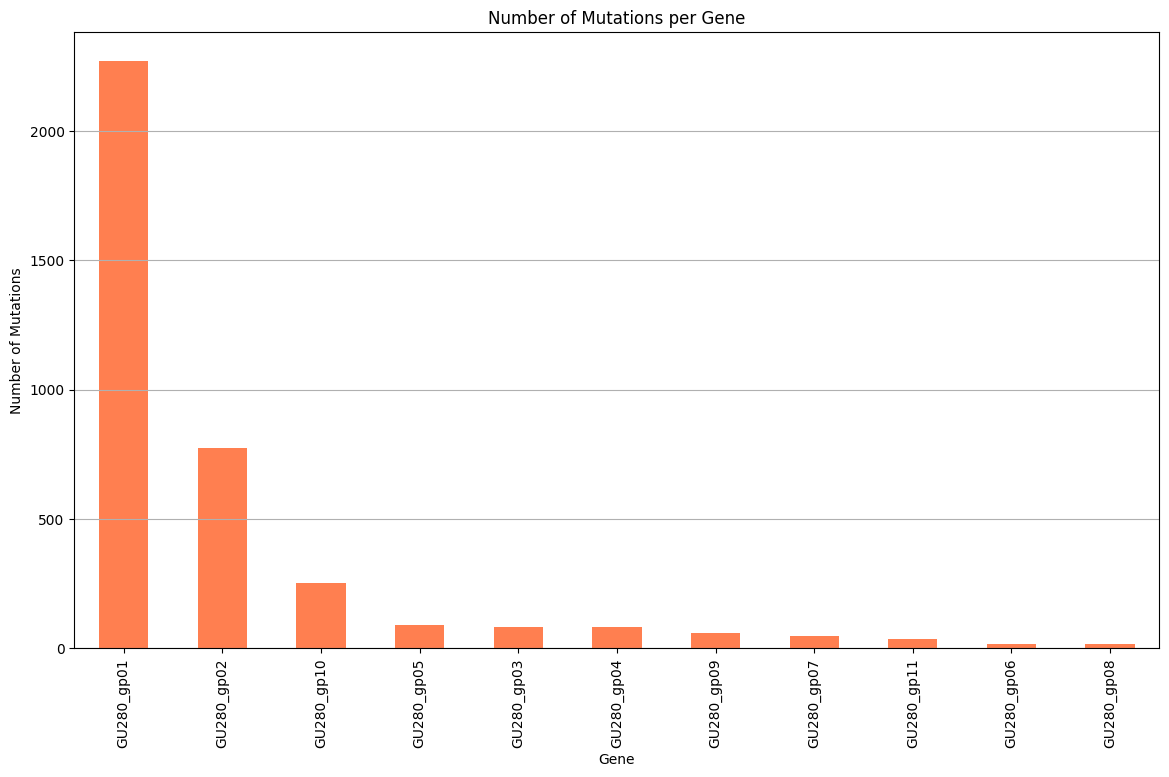

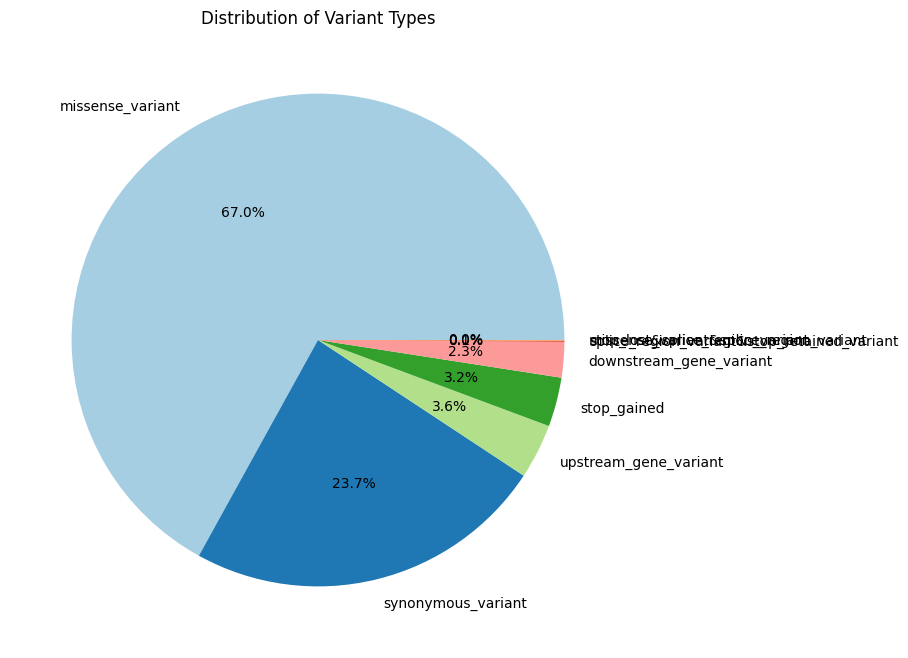

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for all your TSV files
file_paths = [
    '/content/output_mutations.tsv',
    '/content/output_mutations16.tsv',
    '/content/output_mutations17.tsv',
    '/content/output_mutations18.tsv',
    '/content/output_mutations20.tsv',
    '/content/output_mutations21.tsv',
    '/content/output_mutations27.tsv',
    '/content/output_mutations28.tsv',
    '/content/output_mutations29.tsv',
    '/content/output_mutations3.tsv',
    '/content/output_mutations30.tsv',
    '/content/output_mutations31.tsv',
    '/content/output_mutations32.tsv',
    '/content/output_mutations33.tsv',
    '/content/output_mutations34.tsv',
    '/content/output_mutations4.tsv',
    '/content/output_mutations6.tsv',
    '/content/output_mutations7.tsv',
    '/content/output_mutations8.tsv',
    '/content/output_mutations9.tsv'
]

# Load and combine all TSV files into a single DataFrame
dfs = [pd.read_csv(file_path, sep='\t', comment='#') for file_path in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

# Plotting the distribution of mutations across the genome
plt.figure(figsize=(12, 6))
plt.hist(combined_df['POS'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Mutations Across the Genome')
plt.xlabel('Position in Genome')
plt.ylabel('Number of Mutations')
plt.grid(True)
plt.show()

# Grouping the data by gene and counting the number of mutations for each gene
gene_mutation_counts = combined_df['Gene'].value_counts()

# Plotting the number of mutations per gene
plt.figure(figsize=(14, 8))
gene_mutation_counts.plot(kind='bar', color='coral')
plt.title('Number of Mutations per Gene')
plt.xlabel('Gene')
plt.ylabel('Number of Mutations')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Pie chart for variant type distribution
variant_type_counts = combined_df['VariantType'].value_counts()

plt.figure(figsize=(8, 8))
variant_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Variant Types')
plt.ylabel('')
plt.show()

In [ ]:
# Mapping of old protein names to new annotated names
protein_name_mapping = {
    'E (GU280_gp04)': 'SARS-CoV-2 E (Envelope small membrane protein)',
    'M (GU280_gp05)': 'SARS-CoV-2 M (Membrane glycoprotein)',
    'N (GU280_gp10)': 'SARS-CoV-2 N (Nucleocapsid phosphoprotein)',
    'ORF1AB (GU280_gp01)': 'SARS-CoV-2 ORF1ab (Replicase polyprotein 1ab)',
    'ORF1A (GU280_gp12)': 'SARS-CoV-2 ORF1a (ORF1a polyprotein)',
    'ORF3A (GU280_gp03)': 'SARS-CoV-2 ORF3a (Protein 3a)',
    'ORF3B': 'SARS-CoV-2 ORF3b (ORF3b protein)',
    'ORF6 (GU280_gp06)': 'SARS-CoV-2 ORF6 (Non-structural protein 6)',
    'ORF7A (GU280_gp07)': 'SARS-CoV-2 ORF7a (Protein 7a)',
    'ORF7B (GU280_gp08)': 'SARS-CoV-2 ORF7b (Protein non-structural 7b)',
    'ORF8 (GU280_gp09)': 'SARS-CoV-2 ORF8 (Non-structural protein 8)',
    'ORF9B': 'SARS-CoV-2 ORF9b (ORF9b protein)',
    'ORF9C': 'SARS-CoV-2 ORF9c (ORF9c protein)',
    'ORF10 (GU280_gp11)': 'SARS-CoV-2 ORF10 (ORF10 protein)',
    'ORF14 (GU280_gp14)': 'SARS-CoV-2 ORF14 (ORF14 protein)',
    'S (GU280_gp02)': 'SARS-CoV-2 S (Spike glycoprotein)',
    'NSP1 (GU280_gp01_nsp1)': 'SARS-CoV-2 NSP1 (leader protein)',
    'NSP2 (GU280_gp01_nsp2)': 'SARS-CoV-2 NSP2 (Non-structural protein 2)',
    'NSP3 (GU280_gp01_nsp3)': 'SARS-CoV-2 NSP3 (Non-structural protein 3)',
    'NSP4 (GU280_gp01_nsp4)': 'SARS-CoV-2 NSP4 (Non-structural protein 4)',
    'NSP5 (GU280_gp01_nsp5)': 'SARS-CoV-2 NSP5 (3C-like proteinase)',
    'NSP6 (GU280_gp01_nsp6)': 'SARS-CoV-2 NSP6 (Non-structural protein 6)',
    'NSP7 (GU280_gp01_nsp7)': 'SARS-CoV-2 NSP7 (Non-structural protein 7)',
    'NSP8 (GU280_gp01_nsp8)': 'SARS-CoV-2 NSP8 (Non-structural protein 8)',
    'NSP9 (GU280_gp01_nsp9)': 'SARS-CoV-2 NSP9 (Non-structural protein 9)',
    'NSP10 (GU280_gp01_nsp10)': 'SARS-CoV-2 NSP10 (Non-structural protein 10)',
    'NSP11 (GU280_gp12_nsp11)': 'SARS-CoV-2 NSP11 (Non-structural protein 11)',
    'NSP12 (GU280_gp01_nsp12)': 'SARS-CoV-2 NSP12 (RNA-directed RNA polymerase)',
    'NSP13 (GU280_gp01_nsp13)': 'SARS-CoV-2 NSP13 (Helicase)',
    'NSP14 (GU280_gp01_nsp14)': 'SARS-CoV-2 NSP14 (Guanine-N7 methyltransferase)',
    'NSP15 (GU280_gp01_nsp15)': 'SARS-CoV-2 NSP15 (Uridylate-specific endoribonuclease)',
    'NSP16 (GU280_gp01_nsp16)': 'SARS-CoV-2 NSP16 (2-O-methyltransferase)'
}

In [ ]:
# Assume 'Gene' is the column containing the protein names in your DataFrame
combined_df['Gene'] = combined_df['Gene'].replace(protein_name_mapping)

# Display the updated DataFrame
print(combined_df.head())

         CHROM  POS ID REF ALT        Gene            VariantType  \
0  NC_045512.2  161  .   A   G  GU280_gp01  upstream_gene_variant   
1  NC_045512.2  210  .   G   T  GU280_gp01  upstream_gene_variant   
2  NC_045512.2  241  .   C   T  GU280_gp01  upstream_gene_variant   
3  NC_045512.2  249  .   T   A  GU280_gp01  upstream_gene_variant   
4  NC_045512.2  311  .   C   G  GU280_gp01       missense_variant   

   AminoAcidChange       NucleotideChange  
0            105.0  upstream_gene_variant  
1             56.0  upstream_gene_variant  
2             25.0  upstream_gene_variant  
3             17.0  upstream_gene_variant  
4              NaN       missense_variant  


In [ ]:
# Save the updated DataFrame to a new TSV file
!mkdir /mnt/data # creates the directory
combined_df.to_csv('/mnt/data/updated_mutations.tsv', sep='\t', index=False)

In [ ]:
# Save the updated DataFrame to a new TSV file
combined_df.to_csv('/mnt/data/updated_mutations.tsv', sep='\t', index=False)

In [ ]:
print(combined_df.head())

         CHROM  POS ID REF ALT        Gene            VariantType  \
0  NC_045512.2  161  .   A   G  GU280_gp01  upstream_gene_variant   
1  NC_045512.2  210  .   G   T  GU280_gp01  upstream_gene_variant   
2  NC_045512.2  241  .   C   T  GU280_gp01  upstream_gene_variant   
3  NC_045512.2  249  .   T   A  GU280_gp01  upstream_gene_variant   
4  NC_045512.2  311  .   C   G  GU280_gp01       missense_variant   

   AminoAcidChange       NucleotideChange  
0            105.0  upstream_gene_variant  
1             56.0  upstream_gene_variant  
2             25.0  upstream_gene_variant  
3             17.0  upstream_gene_variant  
4              NaN       missense_variant  


In [ ]:
# Count the number of mutations per gene
gene_mutation_counts = combined_df['Gene'].value_counts()

# Normalize to get frequencies (if needed)
gene_mutation_frequencies = gene_mutation_counts / gene_mutation_counts.sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# Generate a color palette with unique colors for each gene
palette = sns.color_palette("tab20", len(gene_mutation_counts))

# Plot the number of mutations per gene with unique colors
gene_mutation_counts.plot(kind='bar', color=palette)

# Add a title and labels
plt.title('Number of Mutations per Gene', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Number of Mutations', fontsize=14)
plt.xticks(rotation=90)

# Show the plot
plt.grid(axis='y')
plt.show()

NameError: name 'gene_mutation_counts' is not defined

<Figure size 1400x800 with 0 Axes>